In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
np.random.seed(7)

In [3]:
def gen_series(N):
    for i in range(1000,N+1000):
        #Enter your own series formula here
        x = i*i + i
        yield x  

In [4]:
series = gen_series(1000)
df = pd.DataFrame(series)
dataset = df.values
dataset = df.astype('float32')

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_normalized = scaler.fit_transform(dataset)

In [6]:
# split into train and test sets
train_size = int(len(dataset_normalized) * 0.67)
test_size = len(dataset_normalized) - train_size
train, test = dataset_normalized[0:train_size,:], dataset_normalized[train_size:len(dataset_normalized),:]
print(len(train), len(test))

670 330


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [13]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


 - 1s - loss: 0.0194


Epoch 2/100


 - 1s - loss: 5.2094e-04


Epoch 3/100


 - 1s - loss: 1.2068e-04


Epoch 4/100


 - 1s - loss: 6.9858e-05


Epoch 5/100


 - 1s - loss: 3.5051e-05


Epoch 6/100


 - 1s - loss: 1.6713e-05


Epoch 7/100


 - 1s - loss: 1.2063e-05


Epoch 8/100


 - 1s - loss: 1.0980e-05


Epoch 9/100


 - 1s - loss: 1.1723e-05


Epoch 10/100


 - 1s - loss: 1.1542e-05


Epoch 11/100


 - 1s - loss: 1.0948e-05


Epoch 12/100


 - 1s - loss: 1.1010e-05


Epoch 13/100


 - 1s - loss: 9.2645e-06


Epoch 14/100


 - 1s - loss: 9.0329e-06


Epoch 15/100


 - 1s - loss: 8.1749e-06


Epoch 16/100


 - 1s - loss: 6.5746e-06


Epoch 17/100


 - 1s - loss: 5.7658e-06


Epoch 18/100


 - 1s - loss: 4.6846e-06


Epoch 19/100


 - 1s - loss: 4.0051e-06


Epoch 20/100


 - 1s - loss: 2.5848e-06


Epoch 21/100


 - 1s - loss: 1.4107e-06


Epoch 22/100


 - 1s - loss: 9.6581e-07


Epoch 23/100


 - 1s - loss: 8.4321e-07


Epoch 24/100


 - 1s - loss: 5.9704e-07


Epoch 25/100


 - 1s - loss: 1.2125e-06


Epoch 26/100


 - 1s - loss: 1.2319e-06


Epoch 27/100


 - 1s - loss: 4.7277e-07


Epoch 28/100


 - 1s - loss: 8.5824e-07


Epoch 29/100


 - 1s - loss: 5.3011e-07


Epoch 30/100


 - 1s - loss: 1.1879e-06


Epoch 31/100


 - 1s - loss: 7.7048e-07


Epoch 32/100


 - 1s - loss: 8.9235e-07


Epoch 33/100


 - 1s - loss: 6.9097e-07


Epoch 34/100


 - 1s - loss: 1.6880e-06


Epoch 35/100


 - 1s - loss: 8.6830e-07


Epoch 36/100


 - 1s - loss: 3.4171e-07


Epoch 37/100


 - 1s - loss: 1.1938e-06


Epoch 38/100


 - 1s - loss: 4.2801e-07


Epoch 39/100


 - 1s - loss: 4.1505e-07


Epoch 40/100


 - 1s - loss: 1.1177e-06


Epoch 41/100


 - 1s - loss: 3.4953e-07


Epoch 42/100


 - 1s - loss: 1.2520e-06


Epoch 43/100


 - 1s - loss: 4.9180e-07


Epoch 44/100


 - 1s - loss: 1.2744e-06


Epoch 45/100


 - 1s - loss: 1.6140e-07


Epoch 46/100


 - 1s - loss: 8.9859e-07


Epoch 47/100


 - 1s - loss: 6.2646e-07


Epoch 48/100


 - 1s - loss: 2.5745e-06


Epoch 49/100


 - 1s - loss: 1.0048e-06


Epoch 50/100


 - 1s - loss: 3.1691e-07


Epoch 51/100


 - 1s - loss: 3.2421e-07


Epoch 52/100


 - 1s - loss: 2.0116e-06


Epoch 53/100


 - 1s - loss: 1.3678e-07


Epoch 54/100


 - 1s - loss: 4.5377e-07


Epoch 55/100


 - 1s - loss: 4.8024e-07


Epoch 56/100


 - 1s - loss: 1.4346e-06


Epoch 57/100


 - 1s - loss: 2.3694e-07


Epoch 58/100


 - 1s - loss: 1.5658e-06


Epoch 59/100


 - 1s - loss: 1.1002e-07


Epoch 60/100


 - 1s - loss: 3.8990e-07


Epoch 61/100


 - 1s - loss: 3.8811e-07


Epoch 62/100


 - 1s - loss: 2.7215e-06


Epoch 63/100


 - 1s - loss: 1.1421e-07


Epoch 64/100


 - 1s - loss: 3.9567e-07


Epoch 65/100


 - 1s - loss: 2.9264e-07


Epoch 66/100


 - 1s - loss: 5.0298e-07


Epoch 67/100


 - 1s - loss: 1.2523e-06


Epoch 68/100


 - 1s - loss: 4.1945e-07


Epoch 69/100


 - 1s - loss: 1.5678e-06


Epoch 70/100


 - 1s - loss: 1.7883e-07


Epoch 71/100


 - 1s - loss: 8.8011e-07


Epoch 72/100


 - 1s - loss: 2.6037e-07


Epoch 73/100


 - 1s - loss: 5.8570e-07


Epoch 74/100


 - 1s - loss: 9.0940e-07


Epoch 75/100


 - 1s - loss: 2.3701e-07


Epoch 76/100


 - 1s - loss: 7.5895e-07


Epoch 77/100


 - 1s - loss: 1.8454e-07


Epoch 78/100


 - 1s - loss: 1.7557e-06


Epoch 79/100


 - 1s - loss: 9.6061e-08


Epoch 80/100


 - 1s - loss: 2.9452e-07


Epoch 81/100


 - 1s - loss: 1.8446e-06


Epoch 82/100


 - 1s - loss: 3.1304e-07


Epoch 83/100


 - 1s - loss: 4.5114e-07


Epoch 84/100


 - 1s - loss: 1.5033e-07


Epoch 85/100


 - 1s - loss: 9.0255e-07


Epoch 86/100


 - 1s - loss: 4.2828e-07


Epoch 87/100


 - 1s - loss: 9.8573e-07


Epoch 88/100


 - 1s - loss: 3.6473e-07


Epoch 89/100


 - 1s - loss: 3.2302e-07


Epoch 90/100


 - 1s - loss: 1.2105e-06


Epoch 91/100


 - 1s - loss: 7.2722e-07


Epoch 92/100


 - 1s - loss: 3.2633e-07


Epoch 93/100


 - 1s - loss: 5.7278e-07


Epoch 94/100


 - 1s - loss: 4.0402e-07


Epoch 95/100


 - 1s - loss: 7.9043e-07


Epoch 96/100


 - 1s - loss: 1.6163e-06


Epoch 97/100


 - 1s - loss: 3.6605e-07


Epoch 98/100


 - 1s - loss: 1.3495e-06


Epoch 99/100


 - 1s - loss: 2.2279e-07


Epoch 100/100


 - 1s - loss: 3.0330e-07


In [14]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1148.16 RMSE
Test Score: 37942.56 RMSE


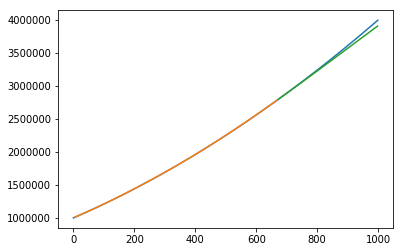

In [14]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset_normalized)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset_normalized)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset_normalized))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()